In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import pandas as pd
import seaborn as sns

sns.set_theme()

In [3]:
tips = pd.read_csv("../../data/tips.csv")

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


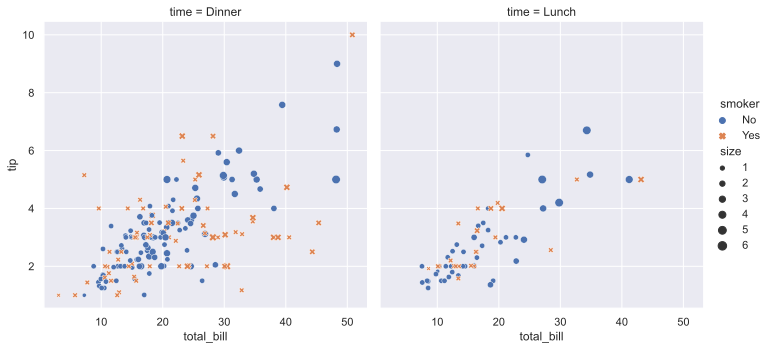

In [5]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

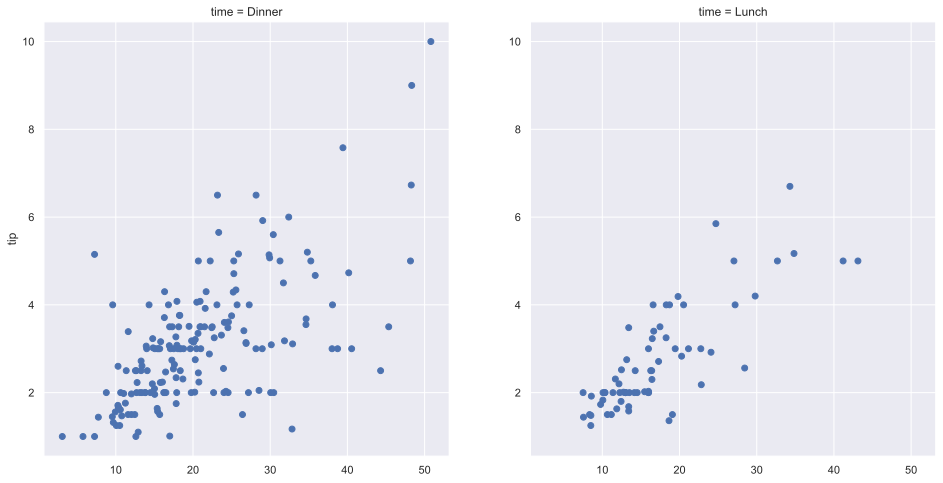

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))

grps = ["Dinner", "Lunch"]
base_xy = {}
for position, grp in enumerate(grps):
    # filter data.
    data = tips.query(f"time.str.contains('{grp}')")

    # set plot grid.
    pos = position + 1
    ax = fig.add_subplot(1, 2, pos)
    ax.scatter(x=data["total_bill"], y=data["tip"])

    # set title
    ax.set_title(f"time = {grp}")

    # set common detail.
    if pos == 1:
        base_xy["x"] = ax.get_xlim()
        base_xy["y"] = ax.get_ylim()
        ax.set_ylabel("tip")
    else:
        ax.set_xlim(base_xy["x"])
        ax.set_ylim(base_xy["y"])


# Basic Chart

<AxesSubplot:xlabel='sex', ylabel='count'>

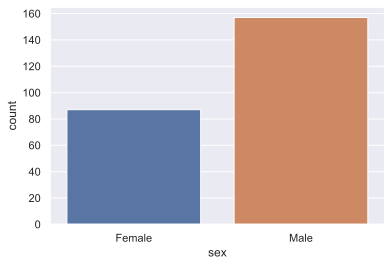

In [7]:
sns.countplot(data=tips, x="sex")

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

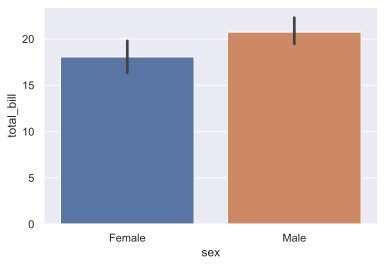

In [8]:
sns.barplot(data=tips, x="sex", y="total_bill")

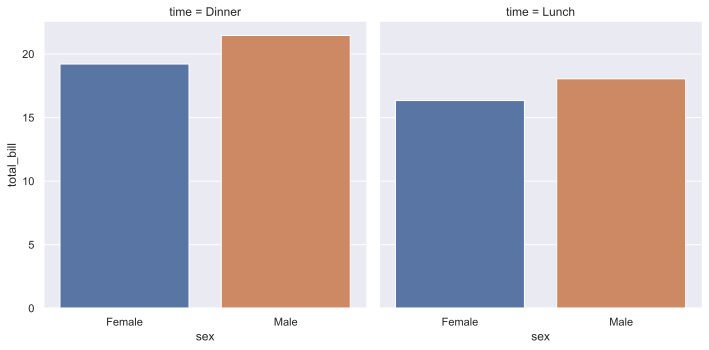

In [9]:
sns.catplot(
    data=tips,
    x="sex",
    y="total_bill",
    ci=None,
    kind="bar",
    col="time",
)

# Grid System

## FacetGrid

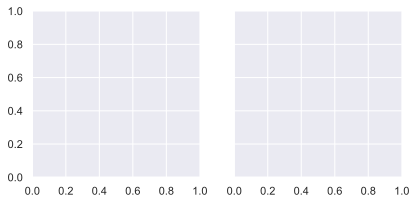

In [10]:
sns.FacetGrid(data=tips, col="time")

/Users/Bobot/pyenvs/pandas-startup/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


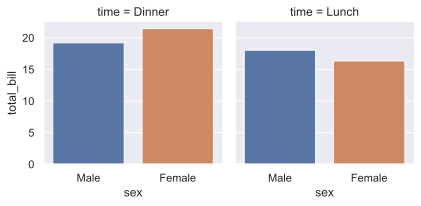

In [11]:
grid = sns.FacetGrid(data=tips, col="time")
grid.map(sns.barplot, "sex", "total_bill", ci=None, palette="deep")

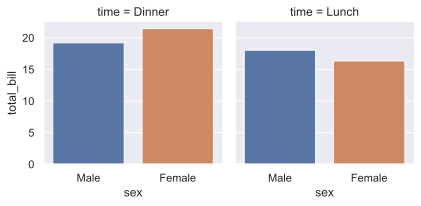

In [12]:
grid = sns.FacetGrid(data=tips, col="time")
grid.map_dataframe(sns.barplot, x="sex", y="total_bill", ci=None, palette="deep")

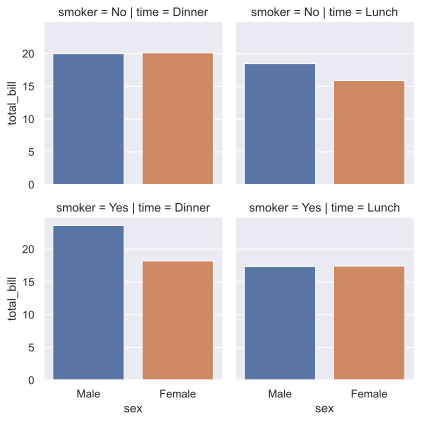

In [13]:
grid = sns.FacetGrid(data=tips, col="time", row="smoker")
grid.map_dataframe(sns.barplot, "sex", "total_bill", ci=None, palette="deep")

## JoinGrid

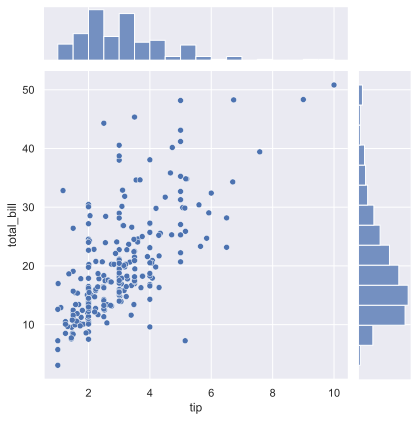

In [14]:
sns.jointplot(data=tips, x="tip", y="total_bill")

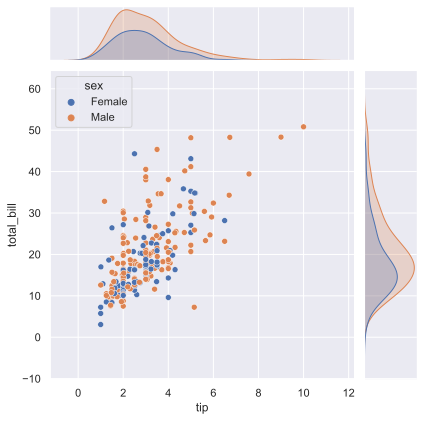

In [15]:
sns.jointplot(data=tips, x="tip", y="total_bill", hue="sex")

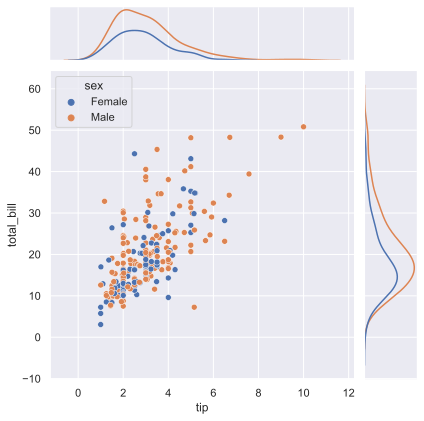

In [16]:
grid = sns.JointGrid(data=tips, x="tip", y="total_bill", hue="sex")
grid.plot(sns.scatterplot, sns.kdeplot)

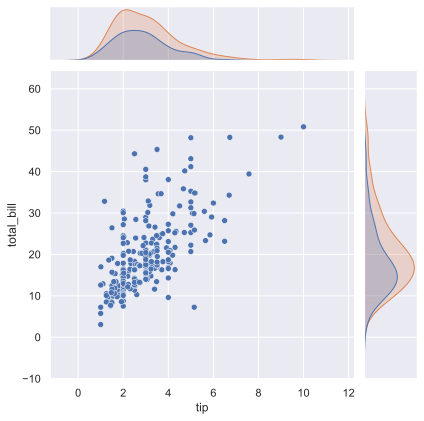

In [17]:
grid = sns.JointGrid(data=tips, x="tip", y="total_bill")
grid.plot_joint(sns.scatterplot)
grid.plot_marginals(sns.kdeplot, hue=tips["sex"], fill=True)

<AxesSubplot:xlabel='Density', ylabel='total_bill'>

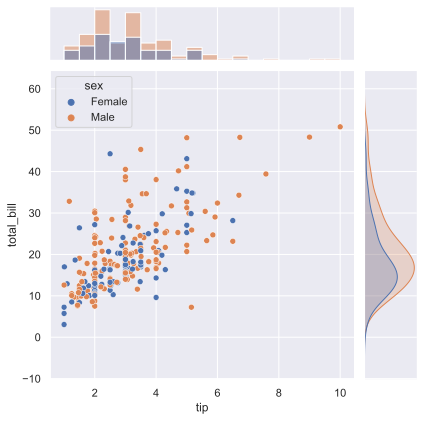

In [18]:
grid = sns.JointGrid(data=tips, x="tip", y="total_bill")

hue = tips["sex"]
x, y = tips["tip"], tips["total_bill"]
sns.scatterplot(x=x, y=y, hue=hue, ax=grid.ax_joint)
sns.histplot(x=x, hue=hue, ax=grid.ax_marg_x, legend=False)
sns.kdeplot(y=y, hue=hue, fill=True, ax=grid.ax_marg_y, legend=False)

## PairGrid

In [19]:
iris = pd.read_csv("../../data/iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


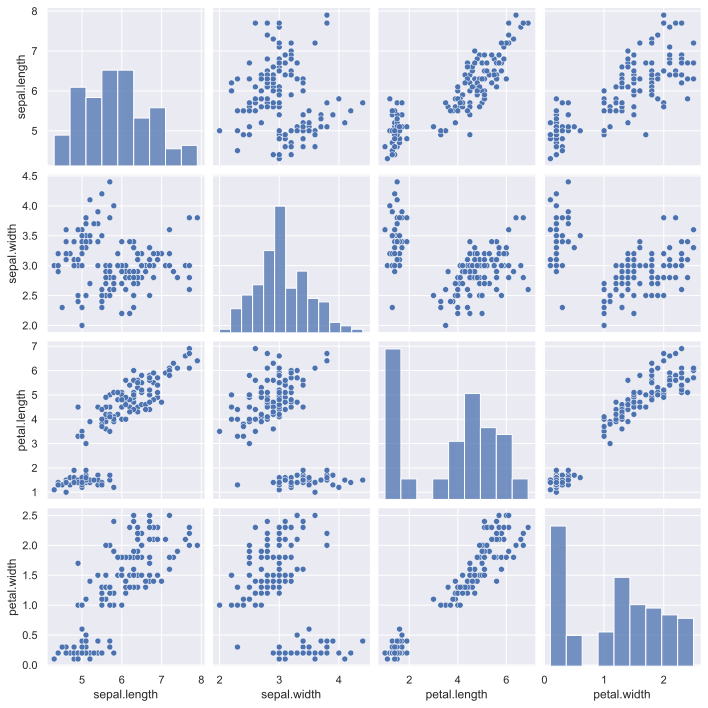

In [20]:
sns.pairplot(iris)

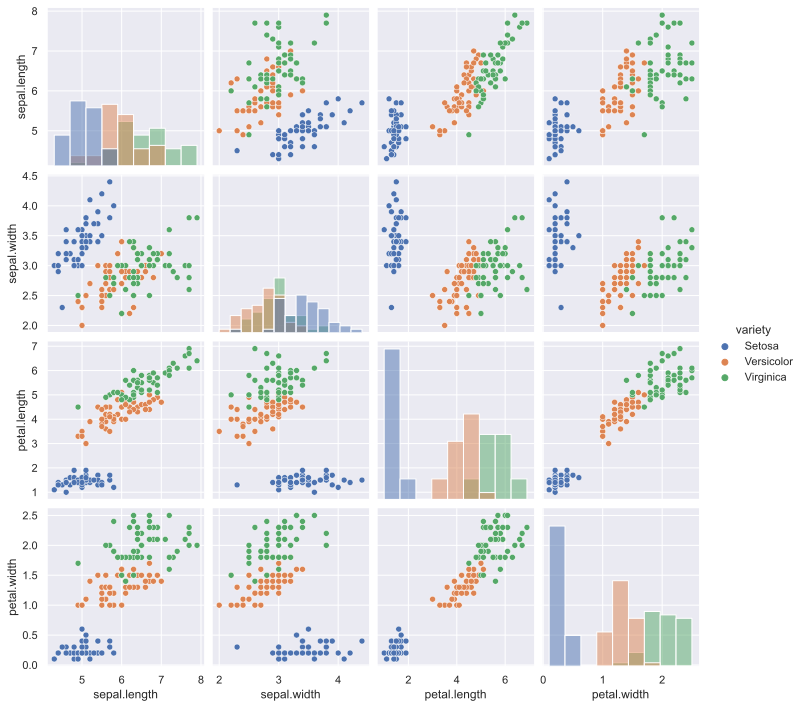

In [21]:
sns.pairplot(iris, hue="variety", diag_kind="hist")

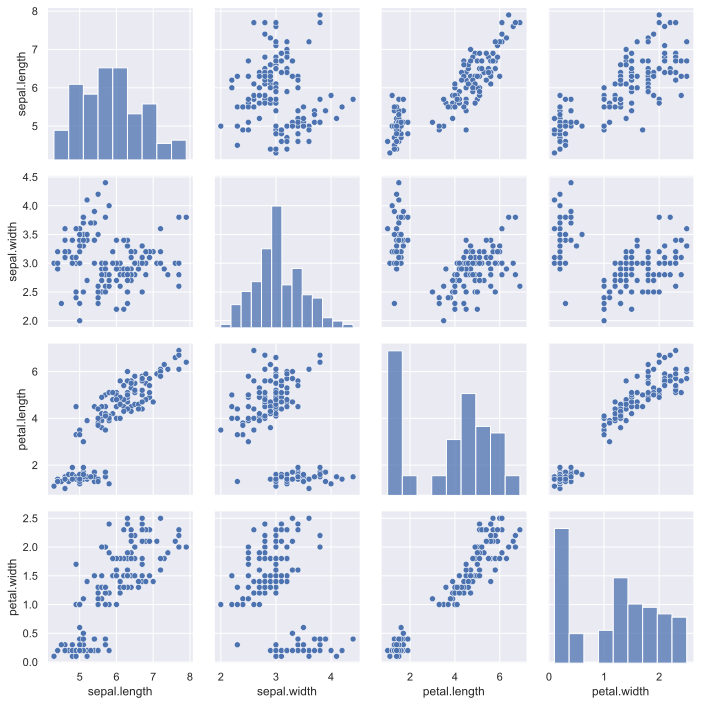

In [22]:
grid = sns.PairGrid(data=iris)
grid.map_diag(sns.histplot)
grid.map_offdiag(sns.scatterplot)

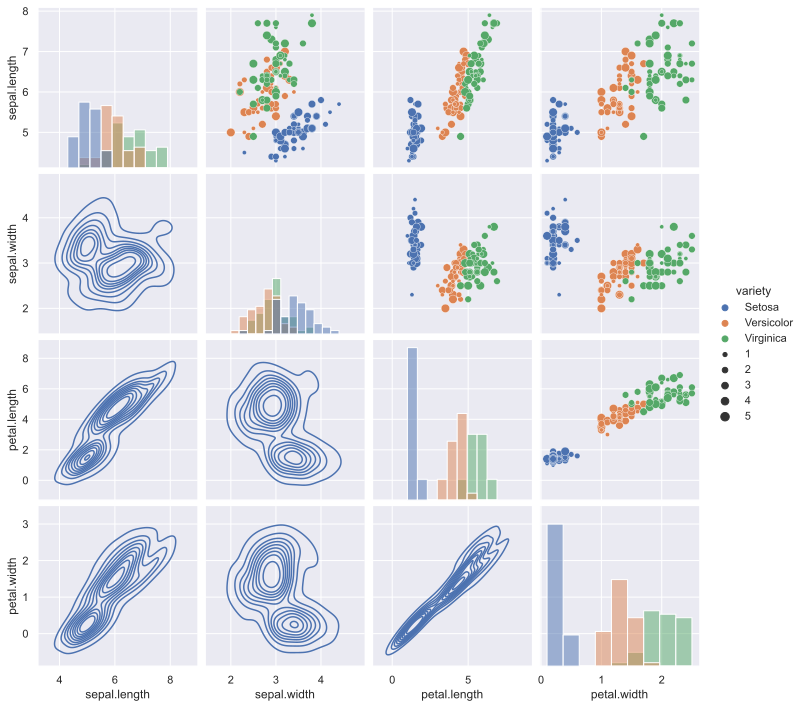

In [23]:
import random
random.seed(3.14)


grid = sns.PairGrid(data=iris, hue="variety")
grid.map_diag(sns.histplot)
grid.map_lower(sns.kdeplot, hue=None)

random_size = [random.randint(1, 5) for _ in range(iris.shape[0])]
grid.map_upper(sns.scatterplot, size=random_size)

grid.add_legend()
grid.tight_layout()